### a) Investigate the performance of a number of machine learning procedures on this dataset

In [1]:
# Import libraries for data loading and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read training dataset
td = pd.read_csv("CE802_P2_Data.csv")
td.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,NaN,False


In [3]:
# checking the features, their shape, duplicate values and nan values in the Datasets
print("\nFeatures Present: \n", td.columns)


Features Present: 
 Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Class'],
      dtype='object')


In [4]:
# check total numbers of rows and features in dataset
shape=td.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])


Total Number of Rows :  1500
Total Number of Features :  16


In [5]:
# check data types and NaN cells in given data
print("\n\nData Types of Features :\n", td.dtypes)
print("\nDataset contains any NaN/Empty cells : ", td.isnull().values.any())



Data Types of Features :
 F1       float64
F2       float64
F3         int64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
F11        int64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

Dataset contains any NaN/Empty cells :  True


In [6]:
print("\nTotal number of empty rows in every feature:\n", td.isnull().sum(),"\n\n")
print("Total number of remarkable values in every feature:")
for col in td.columns.values:
    print("Number of remarkable values of {} : {}".format(col, td[col].nunique()))


Total number of empty rows in every feature:
 F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64 


Total number of remarkable values in every feature:
Number of remarkable values of F1 : 80
Number of remarkable values of F2 : 646
Number of remarkable values of F3 : 4
Number of remarkable values of F4 : 216
Number of remarkable values of F5 : 432
Number of remarkable values of F6 : 660
Number of remarkable values of F7 : 650
Number of remarkable values of F8 : 214
Number of remarkable values of F9 : 11
Number of remarkable values of F10 : 656
Number of remarkable values of F11 : 141
Number of remarkable values of F12 : 91
Number of remarkable values of F13 : 400
Number of remarkable values of F14 : 649
Number of remarkable values of F15 : 331
Number of remarkable values of Class : 2


In [7]:
print ('\n Target variable information ','\n',td.Class.value_counts())


 Target variable information  
 False    809
True     691
Name: Class, dtype: int64


In [8]:
# Total numbers of null values in dataset
td.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [9]:
# find out of F15 median values
td["F15"].median()

10.75

In [10]:
# replace null values by median values
td["F15"].fillna(td["F15"].median(),inplace=True)

In [11]:
# Checking Statistical Informations
td.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000
mean,-290.052000,4.166360,10.806667,3.854280,0.604707,-3.446520,-3.015400,-31.523440,-33.41600,-18.354107,109.024667,-74.315333,4.96876,6.997533,10.746507
std,120.565344,7.621932,9.009814,3.465276,2.217929,5.108542,7.635517,9.500727,14.31863,5.027699,117.334580,71.416874,4.32521,2.491236,0.710496
min,-591.810000,-9.810000,0.000000,0.000000,-4.120000,-20.240000,-16.710000,-50.910000,-68.14000,-33.680000,0.000000,-239.870000,0.00000,2.490000,8.020000
25%,-336.810000,-3.270000,2.000000,0.600000,-0.700000,-7.240000,-10.380000,-39.810000,-48.14000,-22.240000,15.000000,-134.870000,1.24000,4.620000,10.750000
50%,-273.810000,7.110000,2.000000,1.020000,0.300000,-5.440000,-0.045000,-23.700000,-26.14000,-20.320000,50.000000,-38.870000,2.07000,7.950000,10.750000
75%,-234.810000,9.810000,20.000000,7.050000,1.760000,1.545000,2.640000,-22.620000,-22.14000,-13.540000,195.000000,-18.870000,8.20000,8.832500,10.750000
max,53.190000,31.260000,20.000000,10.350000,9.080000,5.500000,22.080000,-20.460000,-16.14000,-9.400000,390.000000,5.130000,15.70000,14.730000,13.100000


In [12]:
# Checking the correlation between the features and the label
td.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
F1,1.000000,0.207789,-0.194345,-0.203882,-0.251693,-0.215099,0.205886,0.224060,-0.238974,-0.207080,-0.069969,0.088436,-0.194739,0.192413,0.051331,0.050738
F2,0.207789,1.000000,-0.863027,-0.855536,0.166323,-0.804192,0.804545,0.873595,0.611943,-0.807678,-0.682649,0.611131,-0.750944,0.794590,0.121544,0.068795
F3,-0.194345,-0.863027,1.000000,0.954840,-0.229981,0.873724,-0.868528,-0.956640,-0.738079,0.877293,0.742369,-0.744822,0.888977,-0.865109,-0.225618,-0.203649
F4,-0.203882,-0.855536,0.954840,1.000000,-0.201330,0.861852,-0.863434,-0.906307,-0.697186,0.867305,0.733312,-0.721849,0.834246,-0.854378,-0.166382,-0.135190
F5,-0.251693,0.166323,-0.229981,-0.201330,1.000000,-0.167082,0.176375,0.182643,0.336565,-0.181686,-0.012291,0.204661,-0.276405,0.170702,-0.013452,-0.024064
F6,-0.215099,-0.804192,0.873724,0.861852,-0.167082,1.000000,-0.813816,-0.884842,-0.630234,0.826213,0.679250,-0.599455,0.755101,-0.802995,-0.112451,-0.079108
F7,0.205886,0.804545,-0.868528,-0.863434,0.176375,-0.813816,1.000000,0.883349,0.614027,-0.809473,-0.690864,0.614240,-0.763419,0.791322,0.124188,0.057144
F8,0.224060,0.873595,-0.956640,-0.906307,0.182643,-0.884842,0.883349,1.000000,0.681754,-0.887500,-0.755121,0.727545,-0.837365,0.873428,0.138519,0.080522
F9,-0.238974,0.611943,-0.738079,-0.697186,0.336565,-0.630234,0.614027,0.681754,1.000000,-0.637027,-0.600153,0.599113,-0.637508,0.620092,0.162056,0.144057
F10,-0.207080,-0.807678,0.877293,0.867305,-0.181686,0.826213,-0.809473,-0.887500,-0.637027,1.000000,0.675264,-0.619599,0.762769,-0.818105,-0.123306,-0.058308


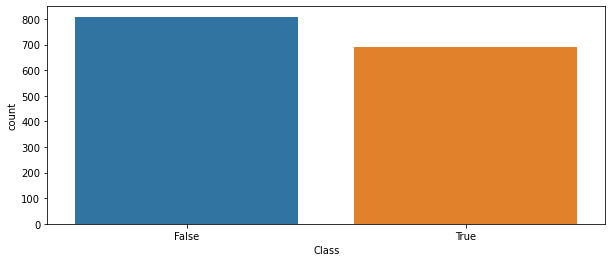

In [13]:
# To display Class feature counts in one go
list=['Class']
for i in list:
    plt.subplots(figsize=(10,4))
    sns.countplot(i,data=td)
    plt.show()

In [14]:
# Checking skewness again
td.skew()

F1      -0.064914
F2       0.124135
F3       0.035490
F4       0.257703
F5       0.677896
F6      -0.074396
F7       0.049802
F8      -0.259086
F9      -1.034693
F10     -0.048598
F11      0.950106
F12     -0.876540
F13      0.609360
F14      0.015165
F15     -0.079305
Class    0.157980
dtype: float64

In [15]:
# Checking the unique values in the features
td.nunique()

F1        80
F2       646
F3         4
F4       216
F5       432
F6       660
F7       650
F8       214
F9        11
F10      656
F11      141
F12       91
F13      400
F14      649
F15      331
Class      2
dtype: int64

In [16]:
# replace class values by boolean values
td.replace({False: 0, True: 1}, inplace=True)

In [17]:
td.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,0
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,0
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,1
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,0
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,10.75,0


In [18]:
x_train=td.drop(['Class'],axis=1)
x_train
print(x_train.shape)

(1500, 15)


In [19]:
# Setting up the Target value in variable y1
y_train=td['Class']
y_train.shape

(1500,)

In [20]:
# read test data set
test_data = pd.read_csv("CE802_P2_Test.csv")
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,NaN,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.64,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.84,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.13,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,NaN,NaN


In [21]:
test_data["F15"].fillna(test_data["F15"].median(),inplace=True)

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   int64  
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  Class   0 non-null      float64
dtypes: float64(14), int64(2)
memory usage: 187.6 KB


In [23]:
x_test=test_data.drop(['Class'],axis=1)
y_test=test_data['Class']

In [24]:
# Importing Important libraries for Classification Models
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques
from sklearn.ensemble import RandomForestClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance 
from sklearn.metrics import accuracy_score

In [25]:
# Defining Instances For Differnt Models and putting best parameters in them
lr=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()

In [26]:
# Scikit-Learn machine learning Models in a list so that it can be used for 
models=[]
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))

In [27]:
# Lists to store model name, Learning score, cross_val_score.
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
# For Loop to Calculate Accuracy Score, Cross Val Score

for name,model in models:
    print('********',name,'********')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')  
    model.fit(x_train,y_train)
# Learning Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
# Finding Cross_val_score    
    cv_score=cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)

******** LogisticRegression ********


LogisticRegression()


Learning Score :  0.7773333333333333
Cross Val Score :  0.7706666666666667
******** DecisionTreeClassifier ********


DecisionTreeClassifier()


Learning Score :  1.0
Cross Val Score :  0.772
******** RandomForestClassifier ********


RandomForestClassifier()


Learning Score :  1.0
Cross Val Score :  0.8773333333333333


In [28]:
# Making a Dataframe includes Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Cross Val Score':cvs}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Cross Val Score
0,LogisticRegression,77.733333,77.066667
1,DecisionTreeClassifier,100.000000,77.200000
2,RandomForestClassifier,100.000000,87.733333


<AxesSubplot:>

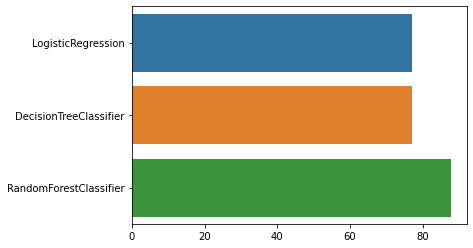

In [29]:
# visualisation of R2 Score
sns.barplot(y=Model,x=cvs)

### Hyper Parameter Tuning

In [30]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    cl = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,n_jobs=-1,refit=True)
    cl.fit(x_train,y_train)
    print(cl.best_params_)

In [31]:
# Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500],'max_features': ['auto', 'sqrt', 'log2'],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'roc_auc')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 500}


### b) Prediction on a hold-out test set

In [32]:
# Using RandomForestClassifier for final model
rfc=RandomForestClassifier(n_estimators=500,max_depth=None, min_samples_leaf= 2, max_features= 'sqrt',min_samples_split=4)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
rfcpred=rfc.predict(x_test)

In [33]:
# Saving predicted values
x_test["Class"] = rfcpred
x_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.775,0
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640,1
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840,1
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130,0
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.775,0


In [34]:
# replacce boolean values by class values
x_test.Class.replace({0: False, 1: True}, inplace=True)

In [35]:
x_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.775,False
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.775,False


In [36]:
x_test.to_csv("CE802_P2_Test_new.csv")